In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_fichier = pd.read_csv("./fichiers/Spotify.csv", sep = ",")
df_fichier

,ID,Artistes,Titre,Durée,Année,Valence,Acoustique,Dansant,Énergie,Explicite,Instrumental,Tonalité,Direct,Intensité,Mode,Discours,Tempo,Popularité
0,4BJqT0PrAfrxzMOxytFOIz,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",831667,1921,0.0594,0.98200,0.279,0.211,Non,0.878000,10.0,0.6650,-20.096,Majeur,0.0366,80.954,4
1,7xPhfUan2yNtyFG0cUWkt8,['Dennis Day'],Clancy Lowered the Boom,180533,1921,0.9630,0.73200,0.819,0.341,Non,0.000000,7.0,0.1600,NaN,Majeur,0.4150,60.936,5
2,1o6I8BglA6ylDMrIELygv1,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,500062,1921,0.0394,0.96100,0.328,0.166,Non,0.913000,3.0,0.1010,-14.850,Majeur,0.0339,110.339,5
3,3ftBPsC5vPBKxYSee08FDH,['Frank Parker'],Danny Boy,210000,1921,0.1650,0.96700,0.275,0.309,Non,0.000028,5.0,0.3810,-9.316,Majeur,0.0354,100.109,3
4,4d6HGyGT8e121BsdKmw9v6,['Phil Regan'],When Irish Eyes Are Smiling,166693,1921,0.2530,0.95700,0.418,0.193,Non,0.000002,3.0,0.2290,-10.096,Majeur,0.0380,101.665,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China,301714,2020,0.6080,0.08460,0.786,0.808,Non,0.000289,7.0,0.0822,-3.702,Majeur,0.0881,105.029,72
170649,0OStKKAuXlxA0fMH54Qs6E,['Ashnikko'],Halloweenie III: Seven Days,150654,2020,0.7340,0.20600,0.717,0.753,Non,0.000000,7.0,0.1010,-6.020,Majeur,0.0605,137.936,68
170650,4BZXVFYCb76Q0Klojq4piV,['MAMAMOO'],AYA,211280,2020,0.6370,0.10100,0.634,0.858,Non,0.000009,4.0,0.2580,-2.226,Mineur,0.0809,91.688,76
170651,5SiZJoLXp3WOl3J4C8IK0d,['Eminem'],Darkness,337147,2020,0.1950,0.00998,0.671,0.623,Oui,0.000008,2.0,0.6430,-7.161,Majeur,0.3080,75.055,70


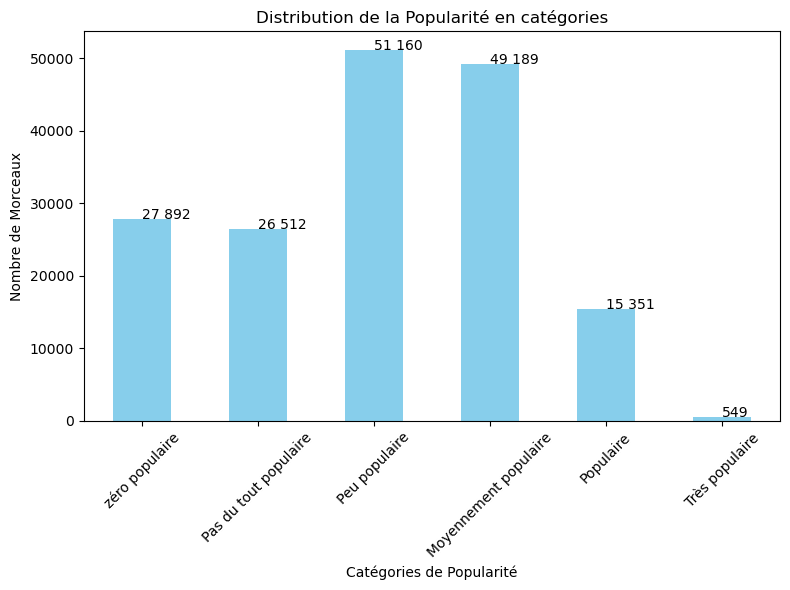

In [79]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],'{:,}'.format(y[i]).replace(',', ' '))
        
#version virgule: f'{y[i]: ^.0f}'

# Création des catégories de popularité 

categories_popularite = ['zéro populaire','Pas du tout populaire', 'Peu populaire', 'Moyennement populaire', 'Populaire', 'Très populaire'] 

  

# Définition des intervalles pour les catégories 

bornes_intervalles = [ -1,0, 20,40,60, 80,100]  

  

# Regroupement des morceaux par catégories de popularité 

df_fichier['CategoriePopularite'] = pd.cut(df_fichier['Popularité'], bins=bornes_intervalles, labels=categories_popularite) 

  

# Compter le nombre de morceaux dans chaque catégorie 

nombre_morceaux_par_categorie = df_fichier['CategoriePopularite'].value_counts().sort_index() 


# Création de l'histogramme 

plt.figure(figsize=(8, 6)) 

nombre_morceaux_par_categorie.plot(kind='bar', color='skyblue') 

plt.title('Distribution de la Popularité en catégories') 

plt.xlabel('Catégories de Popularité') 

plt.ylabel('Nombre de Morceaux') 

addlabels(categories_popularite, nombre_morceaux_par_categorie )

plt.xticks(rotation=45) 

plt.tight_layout() 

plt.show() 

<Figure size 1000x600 with 0 Axes>

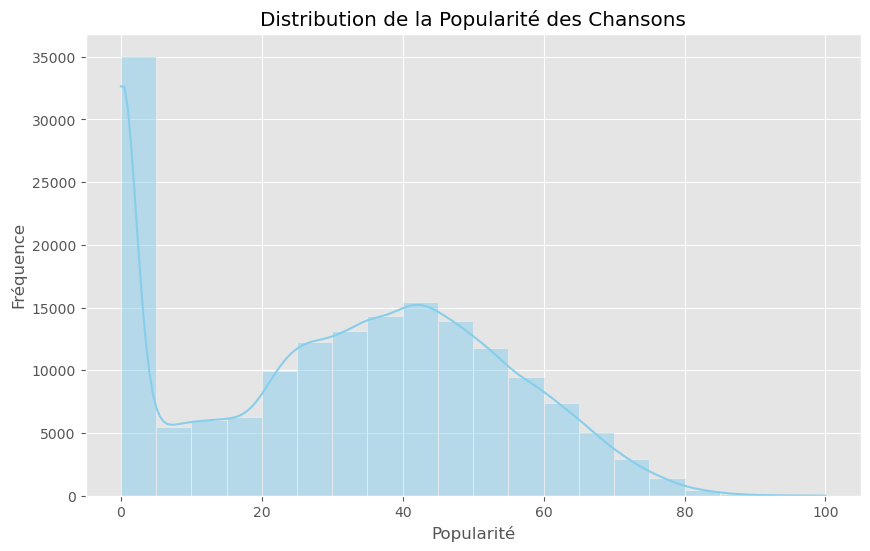

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df_fichier['Popularité'], bins=20, kde=True, color='skyblue')
plt.title('Distribution de la Popularité des Chansons')
plt.xlabel('Popularité')
plt.ylabel('Fréquence')
plt.show()

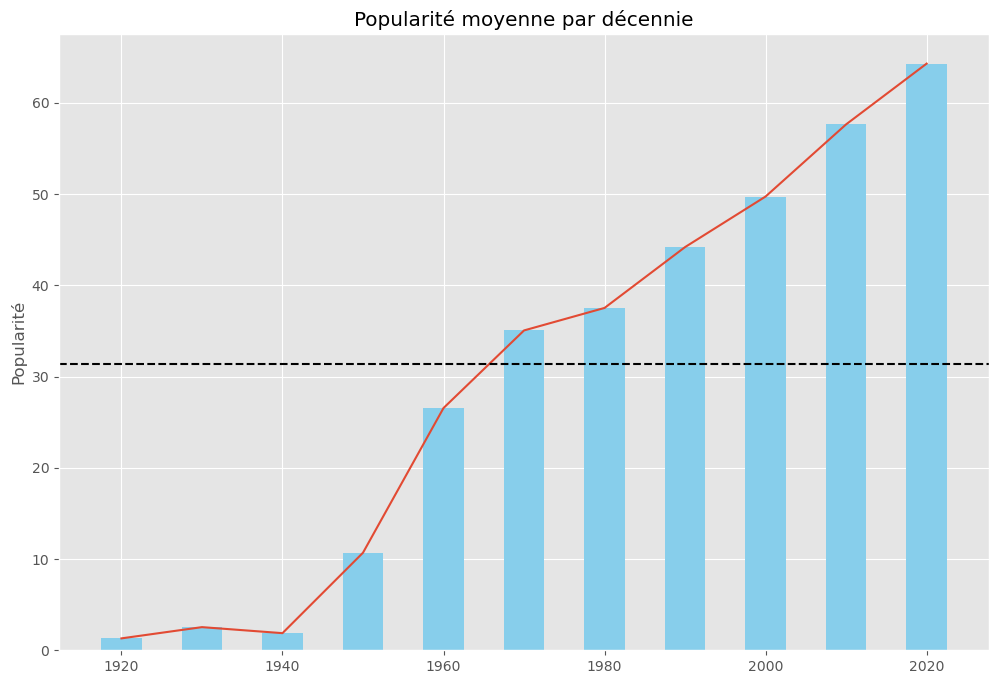

In [80]:
#regrouper les années par décennie
décennie = df_fichier["Année"]//10*10

#popularité moyenne par décennie
grouped_décennie= pd.DataFrame(df_fichier.groupby(décennie)["Popularité"].mean()).reset_index()

#grouped_décennie

#diagramme à bâtonnets
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(grouped_décennie["Année"], grouped_décennie["Popularité"],width = 5,color = "skyblue")
ax.plot(grouped_décennie["Année"], grouped_décennie["Popularité"])

ax.set_ylabel("Popularité")
ax.axhline(df_fichier["Popularité"].mean(), color = "black",linestyle = "--")
plt.title("Popularité moyenne par décennie") 


plt.savefig("popularité_bar_an.png")
plt.show()

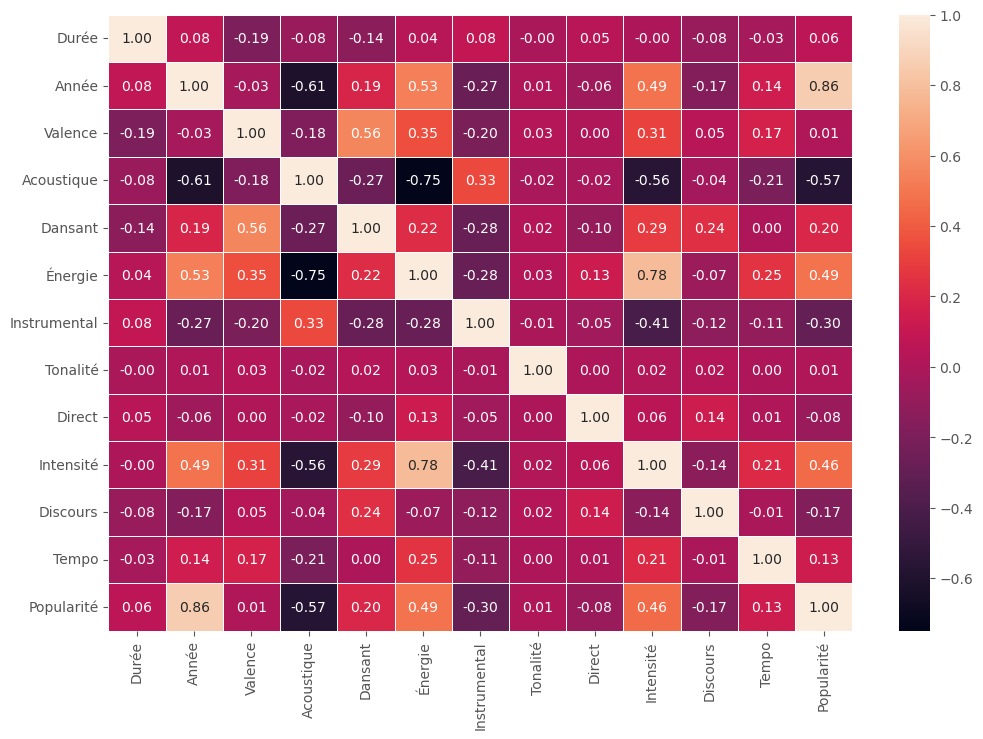

In [81]:
#Examiner la corrélation entre la popularité et les autres variables
test = df_fichier.select_dtypes(include = ["number"])
corr = test.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(12,8))
hm = sns.heatmap(data = corr,annot=True,fmt=".2f", linewidth=.6)
plt.show()

In [82]:
df_fichier.isna().sum()

ID                        0
Artistes                  0
Titre                     0
Durée                     0
Année                     0
Valence                4682
Acoustique             3558
Dansant                3720
Énergie                4699
Explicite              8251
Instrumental           1894
Tonalité               7618
Direct                  651
Intensité              7452
Mode                     88
Discours               6581
Tempo                     0
Popularité                0
CategoriePopularite       0
dtype: int64

In [3]:
df_fichier.dtypes

ID               object
Artistes         object
Titre            object
Durée             int64
Année             int64
Valence         float64
Acoustique      float64
Dansant         float64
Énergie         float64
Explicite        object
Instrumental    float64
Tonalité        float64
Direct          float64
Intensité       float64
Mode             object
Discours        float64
Tempo           float64
Popularité        int64
dtype: object

In [4]:
df_fichier.nunique()

ID              170653
Artistes         34088
Titre           133638
Durée            51755
Année              100
Valence           1729
Acoustique        4677
Dansant           1239
Énergie           2321
Explicite            2
Instrumental      5401
Tonalité            12
Direct            1740
Intensité        25210
Mode                 2
Discours          1624
Tempo            84694
Popularité         100
dtype: int64

In [5]:
df_fichier.select_dtypes(include = ["object"]).nunique()

ID           170653
Artistes      34088
Titre        133638
Explicite         2
Mode              2
dtype: int64

In [6]:
#créer un df contenant tous les colonnes sauf popularité, ID, Titre, tempo et intensité 
X = df_fichier.drop(["Popularité", "ID", "Titre","Année", "Artistes"], axis=1)

In [7]:
y = df_fichier["Popularité"]

In [8]:
cat_cols = list(X.select_dtypes(include = ["object"]))
cat_cols

['Explicite', 'Mode']

In [9]:
num_cols = list(X.select_dtypes(exclude = ["object"]))
num_cols

['Durée',
 'Valence',
 'Acoustique',
 'Dansant',
 'Énergie',
 'Instrumental',
 'Tonalité',
 'Direct',
 'Intensité',
 'Discours',
 'Tempo']

In [10]:
X.shape[1]

13

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#séparer les données pour l'entraînement et le test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1
    )

In [13]:
#séprarer une partie des données en entraînement pour la validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.25, random_state = 1
    )

In [14]:
print("X_train: {0}".format(X_train.shape))
print("X_val: {0}".format(X_val.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (102391, 13)
X_val: (34131, 13)
X_test: (34131, 13)


In [15]:
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_val_num = X_val[num_cols]
X_val_cat = X_val[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

In [16]:
#conserver les indices
index_train = X_train.index
index_val = X_val.index
index_test = X_test.index

In [17]:
from sklearn.impute import SimpleImputer

#### Traiter les valeurs numériques manquantes


In [18]:
# On trouve la médiane de chaque colonne numérique
imp_num = SimpleImputer(strategy = "median").fit(X_train_num)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_num = imp_num.transform(X_train_num)
X_val_num = imp_num.transform(X_val_num)
X_test_num = imp_num.transform(X_test_num)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_num = pd.DataFrame(X_train_num, columns =num_cols, index = index_train)
X_val_num = pd.DataFrame(X_val_num, columns = num_cols, index = index_val)
X_test_num = pd.DataFrame(X_test_num, columns = num_cols, index = index_test)

#### Traiter les valeurs catégorielles manquantes

In [19]:
# Remplacez les données catégorielles manquantes
# On trouve la médiane de chaque colonne numérique
imp_cat = SimpleImputer(strategy = "most_frequent").fit(X_train_cat)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_cat = imp_cat.transform(X_train_cat)
X_val_cat = imp_cat.transform(X_val_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_cat = pd.DataFrame(X_train_cat, columns = cat_cols, index = index_train)
X_val_cat = pd.DataFrame(X_val_cat, columns = cat_cols, index = index_val)
X_test_cat = pd.DataFrame(X_test_cat, columns = cat_cols, index = index_test)

In [20]:
X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_val = pd.concat([X_val_num, X_val_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)

#### Encoder les variables catégorielles


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import RobustScaler, OneHotEncoder

In [22]:
# Encodez les variables catégorielles à l'aide de ColumnTransformer
columnTransformer = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(drop = "first"), cat_cols)],
    remainder = "passthrough"
)

X_train = pd.DataFrame(
    columnTransformer.fit_transform(X_train),
    columns = columnTransformer.get_feature_names_out(),
    index = index_train
)

X_val = pd.DataFrame(
    columnTransformer.transform(X_val),
    columns = columnTransformer.get_feature_names_out(),
    index = index_val
)

X_test = pd.DataFrame(
    columnTransformer.transform(X_test),
    columns = columnTransformer.get_feature_names_out(),
    index = index_test
)

In [23]:
# On conserve le nom des colonnes après l'encodage
colonnes_apres_encodage = X_train.columns

In [24]:
X_train

,encoder__Explicite_Oui,encoder__Mode_Mineur,remainder__Durée,remainder__Valence,remainder__Acoustique,remainder__Dansant,remainder__Énergie,remainder__Instrumental,remainder__Tonalité,remainder__Direct,remainder__Intensité,remainder__Discours,remainder__Tempo
70892,0.0,0.0,295800.0,0.6480,0.0102,0.481,0.7820,0.000002,8.0,0.1270,-8.145,0.0717,169.985
113823,0.0,0.0,179000.0,0.6010,0.4660,0.672,0.0655,0.000031,9.0,0.1200,-22.342,0.0564,133.797
141052,0.0,0.0,201053.0,0.3580,0.9710,0.177,0.3560,0.187000,1.0,0.2790,-10.753,0.0373,85.286
50145,0.0,0.0,204507.0,0.1690,0.9220,0.349,0.2000,0.000038,0.0,0.1240,-15.878,0.0304,129.683
137155,0.0,0.0,148978.0,0.8360,0.1860,0.835,0.5300,0.000056,2.0,0.0402,-13.199,0.0374,111.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86396,0.0,0.0,97160.0,0.0344,0.9900,0.287,0.0223,0.678000,5.0,0.1340,-33.422,0.0345,93.215
131368,0.0,0.0,156933.0,0.4350,0.0826,0.199,0.7500,0.857000,7.0,0.3390,-2.733,0.0340,142.722
157907,0.0,0.0,149427.0,0.7730,0.8330,0.466,0.3750,0.000026,8.0,0.1180,-11.877,0.0450,198.435
70677,0.0,0.0,256027.0,0.1700,0.2700,0.554,0.4080,0.000007,0.0,0.2600,-10.609,0.0317,111.821


#### Standariser les variables explicatives


In [25]:
#ici on utilise RobustScalar qui est moins sensible aux valeurs extrêmes
transformer = RobustScaler().fit(X_train)

In [26]:
# Application tous les échantillons
X_train = transformer.transform(X_train)
X_val = transformer.transform(X_val)
X_test = transformer.transform(X_test)

In [27]:
# Conversion en dataframe
X_train = pd.DataFrame(X_train, columns = colonnes_apres_encodage, index = index_train)
X_val = pd.DataFrame(X_val, columns = colonnes_apres_encodage, index = index_val)
X_test = pd.DataFrame(X_test, columns = colonnes_apres_encodage, index = index_test)

In [28]:
X_test

,encoder__Explicite_Oui,encoder__Mode_Mineur,remainder__Durée,remainder__Valence,remainder__Acoustique,remainder__Dansant,remainder__Énergie,remainder__Instrumental,remainder__Tonalité,remainder__Direct,remainder__Intensité,remainder__Discours,remainder__Tempo
69125,0.0,0.0,-0.003166,-0.180288,-0.145939,0.388664,-0.205950,-0.002285,0.000000,1.111801,-0.438282,0.000000,-0.150753
19786,1.0,1.0,-0.053890,0.064904,0.000000,1.145749,0.340961,-0.002317,0.166667,-0.105590,0.311860,7.813333,0.434373
130015,0.0,0.0,-0.534977,0.788462,-0.562563,0.303644,0.897025,-0.002317,0.166667,0.012422,0.544511,-0.056000,0.318800
92314,1.0,0.0,0.049146,-0.204327,-0.628807,0.797571,0.274600,-0.002317,-0.666667,-0.099379,0.662969,3.840000,0.928834
101456,0.0,0.0,-0.149416,0.000000,-0.058376,-0.267206,0.016018,0.018406,0.000000,0.565217,0.214733,-0.506667,-0.653564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110021,0.0,1.0,-0.063832,-0.978365,0.590102,-0.469636,-0.782609,0.011498,0.000000,-0.173913,-0.690415,-0.309333,-0.296501
106959,0.0,0.0,-0.274183,-0.853365,0.437817,0.761134,-0.398169,-0.002158,-0.500000,-0.466460,0.133959,-0.269333,0.260752
89694,0.0,0.0,-0.185573,0.762019,-0.619289,0.773279,0.835240,-0.002317,-0.166667,2.223602,0.875569,-0.381333,0.121978
32335,0.0,0.0,0.115982,0.935096,-0.529188,0.712551,0.704805,0.013836,0.666667,-0.043478,0.078783,-0.213333,0.215277


#### Apprentissage du modèle
##### Modèle 1. régression linéaire
##### Modèle 2. régression Ridge
#### Modèle 3. régression Lasso



In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, mean_squared_error as mse


In [30]:
#l'entraînement de modèle
modele_lin = LinearRegression().fit(X_train, y_train)

In [31]:
#validation du modèle
#nous allons comparer y_pred (générer par le modèle) avec y_val (les vrais données)
y_pred = modele_lin.predict(X_val)

In [32]:
erreur = mae(y_val, y_pred)

print("La moyenne absolue des erreurs est de {0}".format(erreur))

La moyenne absolue des erreurs est de 13.179236668961797


In [33]:
score_r2_linéaire = r2_score(y_val, y_pred)
print("R2 du modèle linéeaire est de {0}".format(score_r2_linéaire ))

R2 du modèle linéeaire est de 0.44116365051039275


In [34]:
RMSE_linéaire = mse(y_val,y_pred)
print("RMSE est de {0}".format(RMSE_linéaire))

RMSE est de 267.8902122415554


In [35]:
resultats = pd.DataFrame({"Vrai popularité": y_val, "Popularité prédite": y_pred})
#resultats['Différence relative'] = ( resultats["Vrai popularité"] - resultats["Popularité prédite"]) / resultats["Popularité prédite"]
resultats['Différence relative'] = ( resultats["Popularité prédite"] - resultats["Vrai popularité"])# / resultats["Vrai popularité"]
resultats.head(10)

,Vrai popularité,Popularité prédite,Différence relative
28733,48,35.704017,-12.295983
52397,52,45.869200,-6.130800
120202,36,22.732534,-13.267466
163706,24,43.570200,19.570200
75588,0,10.630683,10.630683
100048,26,43.348215,17.348215
136558,42,43.621979,1.621979
42485,0,19.530829,19.530829
133297,32,13.853380,-18.146620
50174,52,43.716092,-8.283908


In [36]:
resultats.sort_values("Différence relative")

,Vrai popularité,Popularité prédite,Différence relative
38500,79,-6.811982,-85.811982
19038,79,9.769520,-69.230480
170056,67,0.887652,-66.112348
38356,76,9.904414,-66.095586
170647,70,4.470365,-65.529635
...,...,...,...
57314,3,62.879444,59.879444
154451,0,60.427852,60.427852
38747,0,64.016776,64.016776
120851,0,65.444607,65.444607


In [37]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

### Régression Ridge


In [59]:
# une liste d'alpha ayant une valeur plus élevée
r_alphas = np.logspace(5, 10, 100)
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
ridge_model = ridge_model.fit(X_train, y_train)


In [60]:
y_pred_ridge = ridge_model.predict(X_val)

In [61]:
erreur_ridge = mae(y_val, y_pred_ridge)

print("La moyenne absolue des erreurs est de {0}".format(erreur_ridge))

La moyenne absolue des erreurs est de 15.195708857157268


In [62]:
print('alpha: %f' % ridge_model.alpha_)

alpha: 100000.000000


In [63]:
print(r_alphas)

[1.00000000e+05 1.12332403e+05 1.26185688e+05 1.41747416e+05
 1.59228279e+05 1.78864953e+05 2.00923300e+05 2.25701972e+05
 2.53536449e+05 2.84803587e+05 3.19926714e+05 3.59381366e+05
 4.03701726e+05 4.53487851e+05 5.09413801e+05 5.72236766e+05
 6.42807312e+05 7.22080902e+05 8.11130831e+05 9.11162756e+05
 1.02353102e+06 1.14975700e+06 1.29154967e+06 1.45082878e+06
 1.62975083e+06 1.83073828e+06 2.05651231e+06 2.31012970e+06
 2.59502421e+06 2.91505306e+06 3.27454916e+06 3.67837977e+06
 4.13201240e+06 4.64158883e+06 5.21400829e+06 5.85702082e+06
 6.57933225e+06 7.39072203e+06 8.30217568e+06 9.32603347e+06
 1.04761575e+07 1.17681195e+07 1.32194115e+07 1.48496826e+07
 1.66810054e+07 1.87381742e+07 2.10490414e+07 2.36448941e+07
 2.65608778e+07 2.98364724e+07 3.35160265e+07 3.76493581e+07
 4.22924287e+07 4.75081016e+07 5.33669923e+07 5.99484250e+07
 6.73415066e+07 7.56463328e+07 8.49753436e+07 9.54548457e+07
 1.07226722e+08 1.20450354e+08 1.35304777e+08 1.51991108e+08
 1.70735265e+08 1.917910

In [64]:
#essayer avec un alpha plus petit
r_alphas_2 = np.arange(0.01, 1, 0.01)
ridge_model_2 = RidgeCV(alphas=r_alphas_2, scoring='r2')

In [65]:
print(r_alphas_2)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]


In [66]:
ridge_model_2 = ridge_model_2.fit(X_train, y_train)


In [67]:
y_pred_ridge_2 = ridge_model_2.predict(X_val)

In [68]:
erreur_ridge_2 = mae(y_val, y_pred_ridge_2)

print("La moyenne absolue des erreurs est de {0}".format(erreur_ridge_2))

La moyenne absolue des erreurs est de 13.179253224592612


In [69]:
score_r2_ridge = r2_score(y_val, y_pred_ridge)
score_r2_ridge_2 = r2_score(y_val, y_pred_ridge_2)
print("R2 du modèle Ridge est de {0} avec un alpha plus grand\n et de {1} avec un alpha plus petit".format(score_r2_ridge,score_r2_ridge_2 ))

R2 du modèle Ridge est de 0.29526523628965673 avec un alpha plus grand
 et de 0.4411634373108376 avec un alpha plus petit


In [49]:
RMSE_ridge = mse(y_val,y_pred_ridge)
print("RMSE est de {0}".format(RMSE_ridge))

RMSE est de 479.3635445051368


### Régression Lasso


In [70]:
l_alphas = np.logspace(5, 10, 100)
lasso_model = LassoCV(alphas=r_alphas)
lasso_model = lasso_model.fit(X_train, y_train)

In [71]:
y_pred_lasso = lasso_model.predict(X_val)

In [72]:
erreur_lasso = mae(y_val, y_pred_lasso)

print("La moyenne absolue des erreurs est de {0}".format(erreur_lasso))

La moyenne absolue des erreurs est de 18.589112780214787


In [73]:
#essayer avec un alpha plus petit
l_alphas_2 = np.arange(0.01, 1, 0.01)
lasso_model_2 = LassoCV(alphas=r_alphas_2)

In [74]:
lasso_model_2 = lasso_model_2.fit(X_train, y_train)

In [75]:
y_pred_lasso_2 = lasso_model_2.predict(X_val)

In [76]:
erreur_lasso_2 = mae(y_val, y_pred_lasso_2)

print("La moyenne absolue des erreurs est de {0}".format(erreur_lasso_2))

La moyenne absolue des erreurs est de 13.181709520023764


In [77]:
score_r2_lasso = r2_score(y_val, y_pred_lasso)
score_r2_lasso_2 = r2_score(y_val, y_pred_lasso_2)
print("R2 du modèle Lasso est de {0} avec un alpha plus grand\n et de {1} avec un alpha plus petit".format(score_r2_lasso,score_r2_lasso_2 ))

R2 du modèle Lasso est de -1.962038007174982e-05 avec un alpha plus grand
 et de 0.4411510987004281 avec un alpha plus petit


In [78]:
RMSE_lasso = mse(y_val,y_pred_lasso)
print("RMSE est de {0}".format(RMSE_lasso))

RMSE est de 479.38089316131567


Il y a peu de différence entre la performance du modèle linéaire, du modèle Ridge et du modèle Lasso. En essayant de différentes valuers d'Alpha dans le modèle Ridge et le modèle Lasso, nous remarquons qu'un Alpha plus petit (signifiant que le modèle s'approche du modèle linéaire) produit un mae plus petit, ce qui correspond au fait que le modèle linéaire a un mae le plus petit parmis les 3 modèles choisis. 
Si on compare le mae et le score r2, on peut conclure que le modèle linéaire est légèrement plus performante que les 2 autres modèles.  